# la reconnaissence d'objet

In [ ]:
- La reconnaissance d’objets est une technique de computer vision utilisée pour l’identification d’objets présents dans des images et des vidéos. La reconnaissance d’objets est le produit d’algorithmes de Deep Learning et de Machine Learning.
- Le but est d’apprendre à un ordinateur à réaliser ce dont les humains sont naturellement capables, et à acquérir un niveau de compréhension approprié de ce que contient l’image.

# Reconnaissance d’objets vs. détection d’objets

In [ ]:
- la détection d’objets est un sous-ensemble de la reconnaissance d’objets, 
où l’objet est non seulement identifié mais également situé dans l’image.

# les algorithmes adoptés

In [ ]:
- CNN
- MobileNet
- KNN 

# algorithme CNN

In [2]:
import matplotlib.pyplot as plt # Matplotlib est le module qui nous permettra de tracer des graphes et d’afficher les images.
import tensorflow as tf # Tensorflow nous permettra de construire nos réseaux de neurones.
import numpy as np # nous permet  de gérer les images comme des matrices de valeurs.
import pandas as pd
import sys

# chargement des données et processing

In [3]:
# Ici on importe la base de données fashion_minst depuis tensorflow.
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()
images = images.astype(float)
images_test = images_test.astype(float)
images = images/255
images_test = images_test/255
print(images.shape)
print(targets.shape)


4431872/4422102 [==============================] - 41s 9us/step
(60000, 28, 28)
(60000,)


# Affichage de l'image

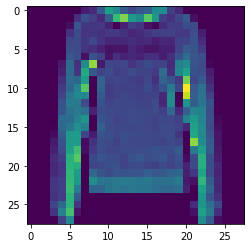

In [4]:
plt.imshow(images[400]) # afficher la 15000eme image

In [5]:
# on définit les noms des catégories
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", "Chemise", "Sneaker", "Sac", "Bottes"]

In [6]:
# Flatten
model = tf.keras.models.Sequential()

#Add the layers
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))#On crée une première couche qui va permettre d’aplatir la matrice. C’est à dire la transformer en vecteur.
model.add(tf.keras.layers.Dense(256, activation="relu"))#On construit maintenant nos 2 couches cachées et la couche de sortie.
model.add(tf.keras.layers.Dense(128, activation="relu"))#Le paramètre activation correspond à la fonction d’activation choisie.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()#faire un résumé de ce que l’on a , Cela nous permet de nous assurer qu’il n’y a pas d’erreurs.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the model 
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [9]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4963 - accuracy: 0.8228 - val_loss: 0.3810 - val_accuracy: 0.8602
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3662 - accuracy: 0.8670 - val_loss: 0.3667 - val_accuracy: 0.8683
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3317 - accuracy: 0.8770 - val_loss: 0.3443 - val_accuracy: 0.8777
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.8875 - val_loss: 0.3347 - val_accuracy: 0.8794
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2881 - accuracy: 0.8920 - val_loss: 0.3189 - val_accuracy: 0.8883
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.8981 - val_loss: 0.3238 - val_accuracy: 0.8863
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2576 - accuracy: 0.9042 - val_loss: 0.3121 - val_accuracy:

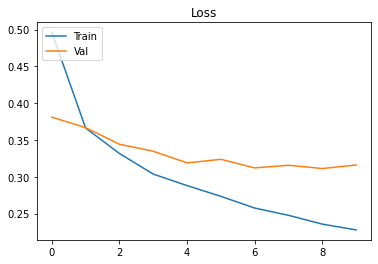

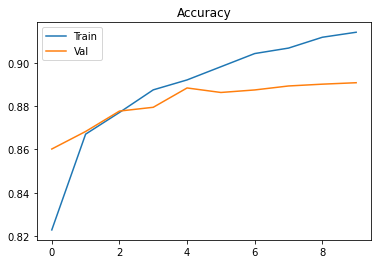

In [10]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [11]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8854
Test loss 0.34476497769355774
Test Accuracy 0.8853999972343445


# fashion_mnist avec CNN

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

data = tf.keras.datasets.fashion_mnist.load_data()

x_train = data[0][0]
y_train = data[0][1]

x_test = data[1][0]
y_test = data[1][1]

In [14]:
# Nos images sont sous la forme de vecteurs lignes, on va les mettre sous forme de vesteurs colonnes:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
#on normalise nos pixels: 
x_train = x_train.astype('float')/255
x_test =x_test.astype('float')/255

In [15]:
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1)))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(128,activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,182,154
Trainable params: 1,182,154
Non-trainable params: 0
____________________________________________

In [17]:
model_cnn.compile(
     loss="sparse_categorical_crossentropy",
     optimizer="adam", 
     metrics=["accuracy"]
)

In [18]:
history = model_cnn.fit(x_train,
                    y_train,
                    epochs = 5,
                    validation_split =0.2)

Epoch 1/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4226 - accuracy: 0.8507 - val_loss: 0.3281 - val_accuracy: 0.8822
Epoch 2/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2857 - accuracy: 0.8975 - val_loss: 0.2831 - val_accuracy: 0.8997
Epoch 3/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2372 - accuracy: 0.9113 - val_loss: 0.2623 - val_accuracy: 0.9048
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2025 - accuracy: 0.9243 - val_loss: 0.2532 - val_accuracy: 0.9104
Epoch 5/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1729 - accuracy: 0.9364 - val_loss: 0.2553 - val_accuracy: 0.9105


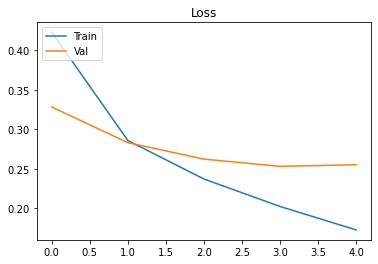

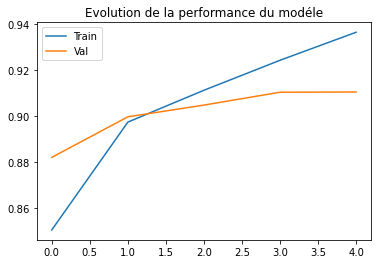

In [19]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Evolution de la performance du modéle")
plt.show()

In [20]:
model.predict(x_test)

array([[1.7261233e-06, 1.2685301e-09, 3.5730512e-08, ..., 2.8155602e-03,
        3.0415556e-08, 9.9232751e-01],
       [2.2879787e-05, 4.5532179e-11, 9.9933189e-01, ..., 8.2075629e-15,
        8.1545609e-10, 5.5918914e-13],
       [1.4360924e-10, 1.0000000e+00, 9.8295883e-14, ..., 1.0800774e-25,
        1.5997231e-13, 7.5125660e-18],
       ...,
       [9.9894380e-05, 4.3414998e-13, 7.9867107e-07, ..., 6.2192711e-08,
        9.9913728e-01, 9.0980598e-13],
       [1.0564766e-11, 1.0000000e+00, 8.9250927e-13, ..., 1.6642705e-17,
        1.9635337e-11, 1.8883827e-12],
       [3.0152409e-05, 1.3421500e-10, 7.9856927e-06, ..., 5.8885817e-05,
        2.8989505e-06, 1.5626030e-07]], dtype=float32)

In [21]:
predictions = []
prob_pred = model.predict(x_test)

for pred in prob_pred:
    predictions.append(np.argmax(pred))
predictions=np.array(predictions)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Text(89.18, 0.5, 'categorie predite')

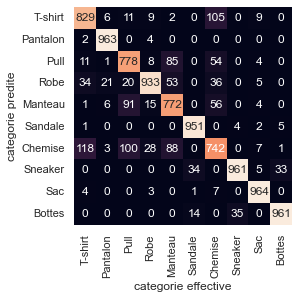

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=targets_names, yticklabels=targets_names)
plt.xlabel('categorie effective')
plt.ylabel('categorie predite')

# algorithme MobileNet

In [24]:
import tensorflow as tf

In [25]:
import numpy as np

In [26]:
filename = 'téléchargement.jpg'

# telecharger une image

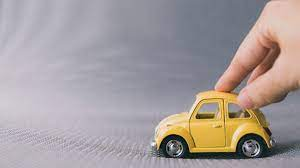

In [28]:
from IPython.display import Image 
Image(filename = 'téléchargement.jpg',width= 224, height= 224)

# modèle de deep learning

# deuxieme methode pour charger une image

In [30]:
filename = 'téléchargement.jpg'

from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size = (224,224))

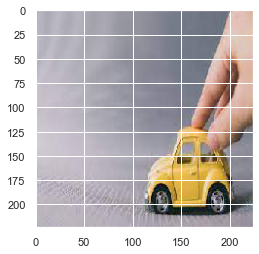

In [31]:
import matplotlib.pyplot as plt ## conda install
plt.imshow(img)

# charger le modèle de deep learning

In [32]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [33]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()

14548992/14536120 [==============================] - 6s 0us/step


# pre-processing de l'image

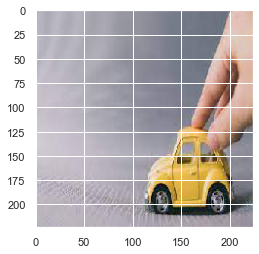

In [34]:
from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size= (224,224))
plt.imshow(img)


In [35]:
resized_img = image.img_to_array(img)
final_image = np.expand_dims(resized_img, axis =0) # neeed fourth dimension
final_image=tf.keras.applications.mobilenet.preprocess_input(final_image)

In [36]:
resized_img.shape

(224, 224, 3)

In [37]:
predictions = mobile.predict(final_image)


In [39]:
from tensorflow.keras.applications import imagenet_utils
results = imagenet_utils.decode_predictions(predictions)


In [40]:
print(results)

[[('n02930766', 'cab', 0.20479618), ('n03384352', 'forklift', 0.021507122), ('n03769881', 'minibus', 0.020662053), ('n03930630', 'pickup', 0.019379301), ('n03594945', 'jeep', 0.0185397)]]


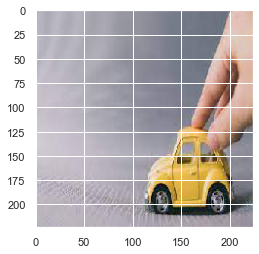

In [41]:
plt.imshow(img)

# classification d'image avec KNN

#charger et comprendre les données

In [42]:
from sklearn import datasets 
digits = datasets.load_digits()
#ceci décrit le jeu de données traité contenant 5.620 images notre jeu de données est plus petit 
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#extraire les fonctions et les valeurs cibles(étiquette de classe)

In [43]:
x = digits.data
y = digits.target
import pandas as pd 
df = pd.DataFrame(data = y, columns = ['targets'])
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


# x est bidimensionnel et a 1797 lignes et 64 colonnes, les 64 colonnes représentent une version aplatie de l’image 8 * 8

In [44]:
x.shape

(1797, 64)

#y a une valeur de 1797


In [45]:
y.shape

(1797,)

#cet ensembles de données de chiffres se composent d’images de 8 x 8 pixels représentant 1797 chiffres écrits à la main (0 à 9) notre objectif est de prédire le chiffre qu’une image représente.cet ensemble de données contient 5620 échantillons -3823 pour la formation et 1797 pour les tests. la version du jeu de données fourni avec scikit_learn ne contient que 1797 échantillons d’essai. Comme spécifié par le jeu de données, chaque échantillon possède 64 entités (comme spécifié par le nombre d’attributs), qui représente une image de 8 x 8 avec des valeurs de pixels comprises entre 0 et 16 (spécifiées par des informations d’attribut).

# Visualisation des données

#la représentation de l’image est accessible en regardant les images numériques, un tableau tridimensionnel de 1797 images, où chaque image est un tableau 8 * 8

In [46]:
digits.images.shape

(1797, 8, 8)

#Regardons la première image, qui est un tableau 8 * 8 d’intensités de pixels

In [47]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
ici, les exemples doivent être stockés dans un tableau bidimensionnel de valeurs en virgule flottante où chaque ligne représente un échantillon et chaque colonne d’une ligne donnée représente une entité pour cet échantillon. pour représenter chaque échantillon comme une ligne, les données multidimensionnelles comme le tableau d’images bidimensionnels montré à l’extérieur[8] doivent être aplaties en un tableau unidimensionnel. ce processus est abordé dans les sections suivantes.

#voyons la première image:

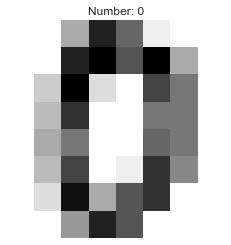

In [50]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[0], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number: ' + str(y[0]))
None

In [ ]:
permet de générer des images pour les 30 premiers chiffres. nous utilisons la méthode des sous-tracés pour spécifier que nous voulons tracer 3 lignes d’images avec 10 images dans chaque ligne; chaque image sera 15 * 6. cette méthode renvoie un tuple contenant deux éléments : la figure et un tableau d’objets axes (pour chaque sous-figure). la méthode ravel est utilisée pour aplatir le tableau d’axes (plus d’informations à ce sujet ci-dessous).

figure, axes = plt.subplot(3,10,figsize=(15,6)) : créez un 15 par 6 dans chaque figure (spécifié par figsize(15,6) contenant 30 sous-tracés disposés en 3 lignes et 10 colonnes chaque sous-tracé a son propre objet axes qui est utilisé pour afficher une image à un chiffre. )

zip() : chaque zip de tuple produit des éléments à partir du même index dans chacun des arguments de zip et cet argument avec le moins d’éléments détermine le nombre de tuples que zip renvoie.

chaque itération de boucle ci-dessous décompresse un tuple d’éléments compressés en 3 variables représentant l’objet axes, l’image et la valeur cible

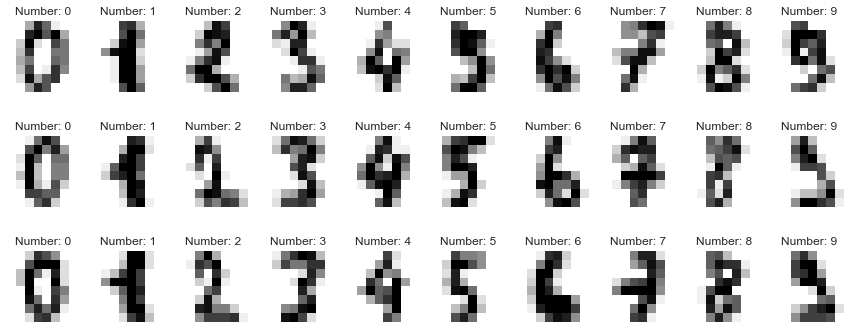

In [51]:
# mettre en place le  plot 
figure, axes = plt.subplots(3,10, figsize = (15,6))
for ax,image,number in zip(axes.ravel(), digits.images, y) :
    ax.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r )
    ax.set_title('Number: ' +str(number))

# Aplatissement des tableaux numpy

In [ ]:
parfois, les données dans un tableau multidimensionnel doivent être aplaties en un tableau unidimensionnel dans le code au-dessus des axes est un tableau bidimensionnel avec 3 lignes et 10 colomns. 
afin d’itérer sur chaque chiffre, nous devons aplatir le tableau .

dans la classification, les données d’entité d’un seul échantillon doivent être stockées dans un tableau unidimensionnel (même s’il ne s’agit pas de la structure réelle),
et les données d’entité de tous les échantillons doivent être un tableau bidimensionnel, mais que se passe-t-il si les données d’entité d’un échantillon sont une image 8*8 ? la solution consiste à aplatir les données. la méthode ravel aplatit les données en lisant le tableau ligne par ligne. les données d’entité (stockées dans x) contiennent la version aplatie de chaque tableau .

In [52]:
image = digits.images[0]
print('original image data =')
print(image)
print()

image_flattened = image.ravel()
print('flattened image = ')
print(image_flattened)
print()

print('feature data for a sample= ')
print(x[0])
print()

print('feature data for all samples is a 8-by-8 two dimensional array= ')
print(x)

original image data =
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

flattened image = 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

feature data for a sample= 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

feature data for all samples is a 8-by-8 two dimensional array= 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.

# classification avec K-nearestvneighbor sur MNIST à l’aide d’ensembles de données de formation et de test

#Divisez les données en ensembles d’entraînement et de test

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=99, stratify= y)
#Le paramètre stratify effectue une division de sorte que la proportion de valeurs dans l’échantillon produit sera 
#la même que la proportion de valeurs fournies pour le  paramètre stratify qui est y.

In [54]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(594,)

# Ajuster le modèle

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Faire des prédictions dans le jeu de données de test

In [56]:
y_pred = knn.predict(x_test)
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5, 1, 1, 6, 6, 1, 9, 1, 3, 8, 0, 0, 1,
       4, 3, 7, 5, 1, 5, 2, 3, 5, 0, 5, 2, 2, 3, 0, 6, 9, 3, 4, 9, 7, 4,
       5, 8, 7, 2, 5, 1, 6, 7, 7, 8, 4, 5, 1, 0, 3, 7, 6, 7, 0, 7, 3, 6,
       7, 2, 6, 1, 5, 0, 3, 9, 3, 1, 0, 4, 3, 0, 2, 7, 3, 7, 7, 9, 1, 4,
       7, 4, 1, 5, 1, 0, 4, 0, 8, 7, 6, 7, 9, 9, 4, 4, 8, 9, 0, 8, 3, 8,
       5, 5, 2, 2, 4, 0, 8, 3, 2, 2, 9, 5, 3, 6, 9, 2, 9, 0, 0, 0, 0, 5,
       4, 2, 8, 6, 9, 4, 4, 6, 7, 3, 8, 0, 6, 7, 2, 1, 8, 0, 7, 3, 1, 7,
       4, 3, 4, 2, 1, 5, 3, 3, 6, 9, 2, 2, 0, 6, 7, 8, 1, 7, 3, 8, 2, 5,
       4, 9, 2, 0, 5, 0, 9, 1, 1, 2, 8, 7, 7, 6, 5, 5, 7, 6, 0, 5, 7, 1,
       4, 5, 9, 0, 5, 1, 9, 9, 5, 6, 6, 7, 4, 9, 5, 4, 8, 8, 1, 3, 3, 1,
       2, 2, 9, 1, 9, 6, 4, 3, 8, 5, 0, 9, 2, 8, 4, 6, 0, 2, 7, 2, 3, 6,
       1, 8, 9, 5, 6, 0, 8, 5, 8, 6, 5, 0, 3, 1, 7, 0, 7, 2, 8, 5, 1, 5,
       6, 9, 3, 0, 0, 3, 9, 4, 5, 0, 6, 1, 3, 3, 7, 4, 1, 4, 0, 7, 1, 7,
       2, 6, 5, 9, 0, 0, 9, 6, 6, 0, 5, 4, 0, 1, 4,

# Évaluer les résultats en générant un rapport de classification qui calcule diverses mesures de rendement

In [ ]:
notre classificateur KNN identifie correctement la plupart des chiffres 99% du temps en moyenne!

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        60
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        59
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



# Évaluer les résultats en examinant la matrice de confusion

In [ ]:
une matrice de confusion est une matrice qui montre comment les observations de chaque ligne (chaque classe) ont été classées (correspondant à chaque colonne). 
comme leur nom l’indique, les matrices de confusion sont utiles pour identifier les domaines où le classificateur peut être « confus » 
(c’est-à-dire lorsqu’il classe systématiquement une catégorie particulière de manière erronée).

In [58]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 58]], dtype=int64)

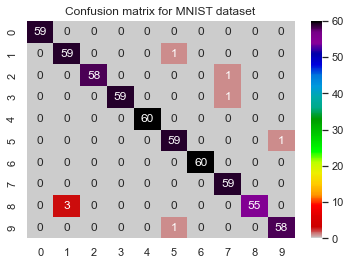

In [59]:
import seaborn as sns 
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion matrix for MNIST dataset')
None

# Obtenir des mesures de rendement précises

In [ ]:
nous pouvons obtenir la précision (nombre correct/nombre d’observations) 
en utilisant la méthode knn.score ou la méthode metrics.accuracy.score

In [60]:
# calculer la précision globale à l’aide de knn.score
acc = knn.score(x_test, y_test)
print(f'accuracy from knn.score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

# calculer la précision globale à l’aide de metrics.accuracy_score
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy_score = {acc:.4}')

accuracy from knn.score = 0.9865
accuracy from metrics.accuracy_score = 0.9865


# comparaison des 3 algorithmes

In [ ]:
l'algorithme CNN applique un filtre à l’image d’entrée, les paramètres du filtre seront appris au fur et à mesure de l’apprentissage. 
Un filtre appris permettra de détecter les angles dans une image si les angles servent à classifier au mieux l’image. L’image est d’abord décomposé dans les 3 cannaux (R,G,B) pixels par pixels, on obtient donc 3 matrices de taille n x n (où n est le nombre de pixels).
Ces réseaux sont utilisés pour tout usage autour de l’image ou de la vidéo dont fait partie la reconnaissance faciale ou encore la classification d’image.
il admet un couche d'entré (input) et de sortie(output).